# **Import Libraries**


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

# **Objective Functions**

In [ ]:
# Sphere
def sphere(x):
    f = 0
    for i in x:
        f += i**2
    return f

# Zakharov
def zakharov(x):
    f1 = 0
    for i in x:
        f1 += i ** 2

    f2 = 0
    for i in range(len(x)):
        f2 += 0.5*(i+1)*x[i]
    f2 = f2**2

    f3 = f2**2

    return f1 + f2 + f3

# Rosenbrock
def rosenbrock(x):
    f = 0
    for i in range(len(x)-1):
        f += (100 * ((x[i+1] - x[i]**2))**2 + (x[i] - 1)**2)  
    return f

# Michalewicz 
def michalewicz(x):
    f = 0
    m = 10
    for i in range(len(x)):
        f += np.sin(x[i]) * (np.sin( ((i+1)*x[i]**2) / np.pi ))**(2*m)

    return -f

# Ackley 
def ackley(x):
    a = 20
    b = 0.2 
    c = 2*np.pi

    return -a * np.exp(-b * np.sqrt(np.sum(x**2)/len(x))) - np.exp(np.sum(np.cos(c*x))/len(x)) + a + np.exp(1)

# **Differential Evolution (DE)**

In [ ]:
def de(fobj, bounds, F_scale, cross_prob, popsize, max_evals, random_seed):
    np.random.seed(random_seed)
    
    generation = 0
    num_evals = 0

    dimensions = len(bounds)

    lower_bound, upper_bound = np.asarray(bounds).T

    diff = np.fabs(lower_bound - upper_bound)

    pop = lower_bound + diff * np.random.rand(popsize, dimensions)

    fitness = np.asarray([fobj(ind) for ind in pop])
    num_evals += popsize

    best_idx = np.argmin(fitness)

    best = pop[best_idx]

    results = []
    all_pops = []
    results.append((np.copy(best), fitness[best_idx], generation))
    all_pops.append(np.copy(pop))
    while True:
        if num_evals > max_evals:
            break

        for i in range(popsize):
            idxs = [idx for idx in range(popsize) if idx != i]
            a, b, c = pop[np.random.choice(idxs, 3, replace=False)]
            mutant = np.clip(a + F_scale * (b-c), lower_bound, upper_bound)

            cross_points = np.random.rand(dimensions) < cross_prob
            if not np.any(cross_points):
                cross_points[np.random.randint(0, dimensions)] = True
            
            trial = np.where(cross_points, mutant, pop[i])

            f = fobj(trial)
            num_evals += 1

            if f < fitness[i]:
                fitness[i] = f
                pop[i] = trial
                if f < fitness[best_idx]:
                    best_idx = i
                    best = trial
        
        generation += 1
        results.append((np.copy(best), fitness[best_idx], num_evals, generation))
        all_pops.append(np.copy(pop))
        
        if np.all(np.isclose(pop, best)):
            break

    return results, all_pops

In [ ]:
fobj = ackley
bounds = [(-33,33)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results[-1])
    random_seed += 1

In [ ]:
print(f"fobj={fobj.__name__}  d={dimensions}  n={popsize}" )
print("# best_individual  # fitness  # num_evals  # generation")
all_results

fobj=ackley  d=10  n=1024
# best_individual  # fitness  # num_evals  # generation


[(array([ 8.20843904e-07,  3.97804650e-05,  3.33820346e-04, -1.43183527e-04,
         -1.35531539e-04,  1.86188161e-04,  2.76982581e-04,  1.60977582e-04,
         -5.69119894e-05,  8.65051499e-05]),
  0.0006943145208571089,
  1000448,
  976),
 (array([-2.32607230e-04,  8.74564759e-05,  2.60709350e-04, -3.34779575e-04,
          2.04885052e-04, -2.21437217e-04, -1.58141805e-04, -1.76775622e-04,
         -2.10997952e-04, -1.00746159e-04]),
  0.0008449707846343024,
  1000448,
  976),
 (array([ 3.34287666e-05,  3.46719956e-04, -7.02198621e-05,  2.73139768e-04,
          4.56913254e-06, -1.86226483e-04,  2.25216592e-04,  6.06321170e-05,
         -2.15754504e-06,  1.59005549e-04]),
  0.0007118966488026679,
  1000448,
  976),
 (array([-5.01296583e-05,  1.71191627e-04, -7.66461740e-05,  1.35204648e-04,
         -1.77401467e-04,  4.15836645e-04,  9.21388440e-04,  2.78210272e-04,
         -6.89403464e-04,  1.06621677e-03]),
  0.002131060079296976,
  1000448,
  976),
 (array([ 7.35352531e-04, -5.

In [ ]:
print(f"Giá trị trung bình (mean) khi chạy DE với hàm {fobj.__name__} (d={dimensions}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) khi chạy DE với hàm {fobj.__name__} (d={dimensions}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")
print(f"Trung bình số lần gọi hàm đánh giá (num_evals) khi chạy DE với hàm {fobj.__name__} (d={dimensions}, n={popsize}): {np.mean([all_results[i][2] for i in range(len(all_results))])}")

Giá trị trung bình (mean) khi chạy DE với hàm ackley (d=10, n=1024): 0.0011291229597209628
Độ lệch chuẩn (std) khi chạy DE với hàm ackley (d=10, n=1024): 0.0005151716177537138
Trung bình số lần gọi hàm đánh giá (num_evals) khi chạy DE với hàm ackley (d=10, n=1024): 1000448.0


# **Cross-Entropy Method (CEM) (bản cải tiến)**

In [ ]:
def cem(fobj, bounds, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed):
    np.random.seed(random_seed)
    gen = 0 
    num_evals = 0
    dimensions = len(bounds)

    lower_bound, upper_bound = np.asarray(bounds).T

    diff = np.fabs(lower_bound - upper_bound)

    mu = lower_bound + diff * np.random.rand(dimensions)

    mu_fitness = fobj(mu)
    num_evals += 1

    sigma = sigma_init * np.eye(dimensions)

    results = []
    results.append((np.copy(mu), mu_fitness, num_evals, gen))

    while True:
        if num_evals > max_evals:
            break
        
        search_points = np.random.multivariate_normal(mu, sigma, popsize)
        if np.all(np.isclose(search_points, mu)):
            break
        fitness = np.asarray([fobj(search_points[i]) for i in range(popsize)])
        num_evals += popsize
        elite_idx = fitness.argsort()[:num_elite]
        elite_search_points = np.asarray([search_points[i] for i in elite_idx])

        simga = np.zeros_like(sigma)
        for i in range(num_elite):
            z = elite_search_points[i] - mu
            z = z.reshape(-1, 1)
            sigma += np.dot(z, z.T)
        
        sigma += extra_variance * np.eye(dimensions)
        sigma *= (1/num_elite)
        
        mu = np.mean(elite_search_points, axis=0)
        mu_fitness = fobj(mu)
        
        gen += 1

        results.append((np.copy(mu), mu_fitness, num_evals, gen))
        
    return results

In [ ]:
fobj = ackley
bounds = [(-33,33)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results[-1])
    random_seed += 1

In [ ]:
print(f"fobj={fobj.__name__}  d={dimensions}  n={popsize}" )
print("# best_individual  # fitness  # num_evals  # generation")
all_results

fobj=ackley  d=10  n=1024
# best_individual  # fitness  # num_evals  # generation


[(array([ -0.99561319,  -7.9982867 , -18.00724614,  12.99628786,
           2.99852329, -20.00032678,   0.99643756,  16.99977712,
          19.00520674,  23.00004236]), 18.933555937853892, 1000449, 977),
 (array([  2.00337272,  -0.9995851 ,   3.99174977,  19.99461009,
          -6.99886781,   9.99080632,  14.98865697,  -6.99595546,
         -10.99042493,  -3.00298673]), 17.220900486621073, 1000449, 977),
 (array([ -6.99611118,   1.9895602 ,  19.99864478,   7.99525622,
           6.00158896, -30.00699705, -23.99204831, -16.00096608,
           5.99123379, -15.99813442]), 19.195052719433722, 1000449, 977),
 (array([ -0.99784091,  24.00025993, -28.00319105,  22.99251542,
          12.99907984,  20.99990331,   0.99545323, -22.00055147,
          -0.9909144 ,  -4.99652647]), 19.37886239367085, 1000449, 977),
 (array([-23.00270145, -10.00398161, -23.99169305, -13.99484549,
          27.98942163,  26.00925933, -11.99857008,  -2.99965693,
          26.99599187,  -0.99576764]), 19.5845210535725

In [ ]:
print(f"Giá trị trung bình (mean) khi chạy CEM với hàm {fobj.__name__} (d={dimensions}, n={popsize}): {np.mean([all_results[i][1] for i in range(len(all_results))])}")
print(f"Độ lệch chuẩn (std) khi chạy CEM với hàm {fobj.__name__} (d={dimensions}, n={popsize}): {np.std([all_results[i][1] for i in range(len(all_results))])}")
print(f"Trung bình số lần gọi hàm đánh giá (num_evals) khi chạy CEM với hàm {fobj.__name__} (d={dimensions}, n={popsize}): {np.mean([all_results[i][2] for i in range(len(all_results))])}")

Giá trị trung bình (mean) khi chạy CEM với hàm ackley (d=10, n=1024): 18.832692884449433
Độ lệch chuẩn (std) khi chạy CEM với hàm ackley (d=10, n=1024): 0.9151508374092646
Trung bình số lần gọi hàm đánh giá (num_evals) khi chạy CEM với hàm ackley (d=10, n=1024): 1000449.0


# **Plot**

## **Sphere**

### **d=2**

In [ ]:
# DE_128
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

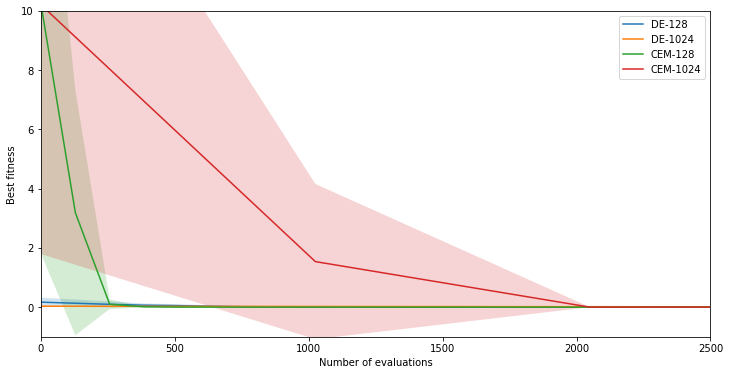

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2500)
plt.ylim(-1, 10)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('sphere_2.png')
plt.show()

### **d=10**

In [ ]:
# DE_128
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = sphere
bounds = [(-5.12,5.12)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

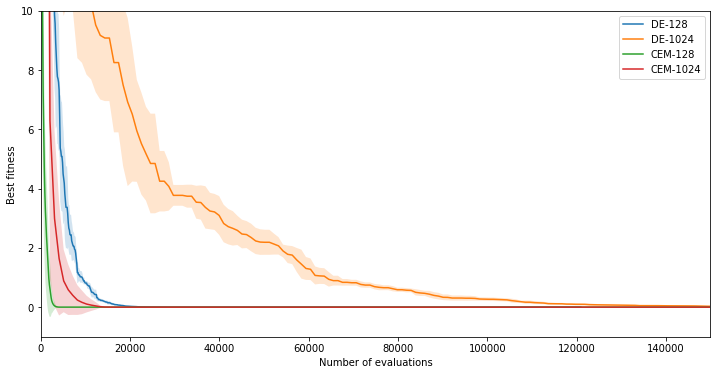

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=1e5 + 5e4)
plt.ylim(-1, 10)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('sphere_10.png')
plt.show()

## **Zakharov**

### **d=2**

In [ ]:
# DE_128
fobj = zakharov
bounds = [(-5,10)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = zakharov
bounds = [(-5,10)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = zakharov
bounds = [(-5,10)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = zakharov
bounds = [(-5,10)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

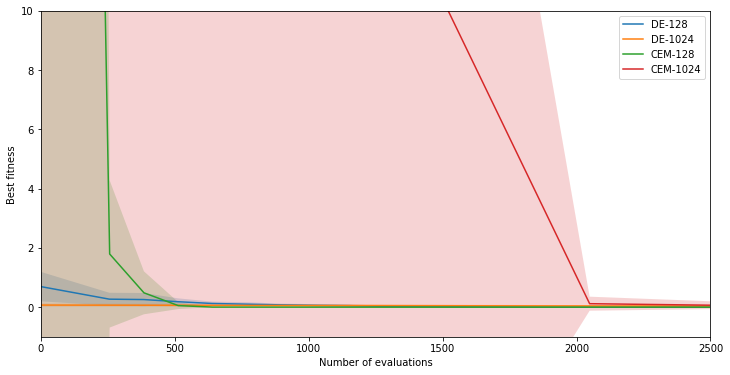

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2500)
plt.ylim(-1, 10)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('zakharov_2.png')
plt.show()

### **d=10**

In [ ]:
# DE_128
fobj = zakharov
bounds = [(-5,10)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = zakharov
bounds = [(-5,10)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = zakharov
bounds = [(-5,10)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = zakharov
bounds = [(-5,10)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

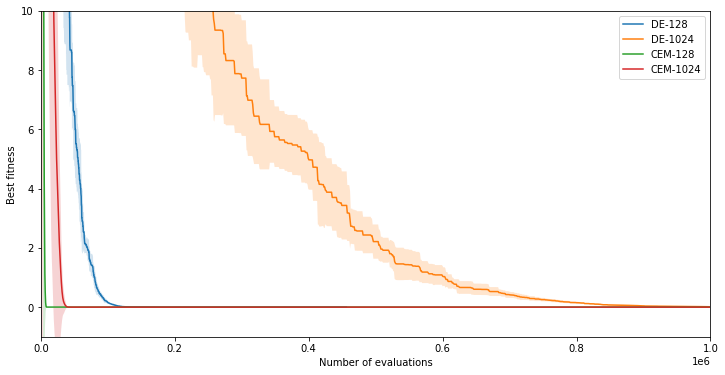

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=1e6)
plt.ylim(-1, 10)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('zakharov_10.png')
plt.show()

## **Rosenbrock**

### **d=2**

In [ ]:
# DE_128
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

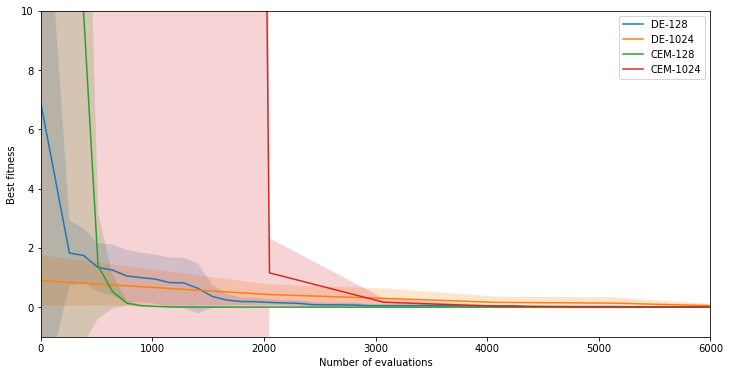

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=6000)
plt.ylim(-1, 10)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('rosenbrock_2.png')
plt.show()

### **d=10**

In [ ]:
# DE_128
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = rosenbrock
bounds = [(-5,10)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

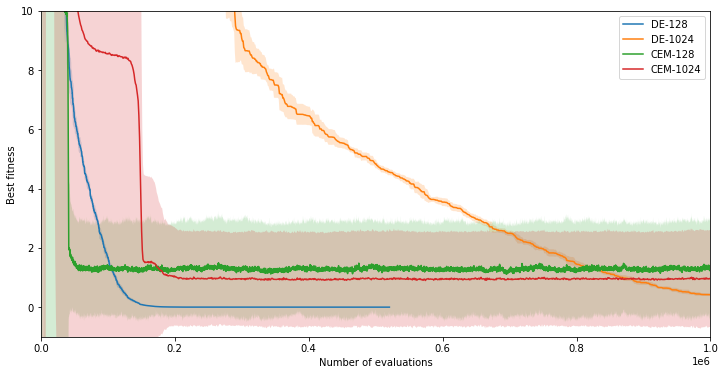

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=1e6)
plt.ylim(-1, 10)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('rosenbrock_10.png')
plt.show()

## **Michalewicz**

### **d=2**

In [ ]:
# DE_128
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

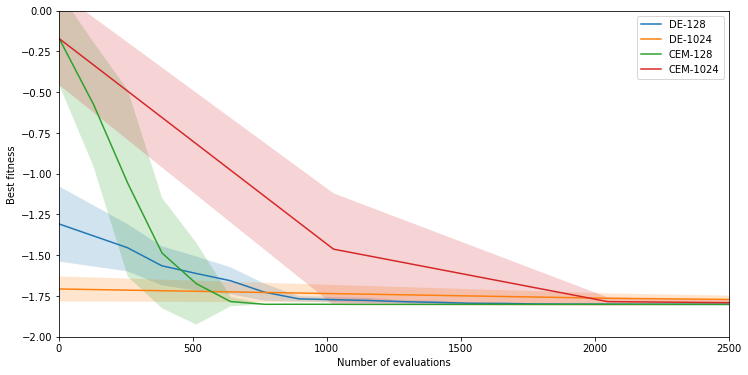

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=2500)
plt.ylim(-2, 0)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('michalewicz_2.png')
plt.show()

### **d=10**

In [ ]:
# DE_128
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = michalewicz
bounds = [(0,np.pi)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

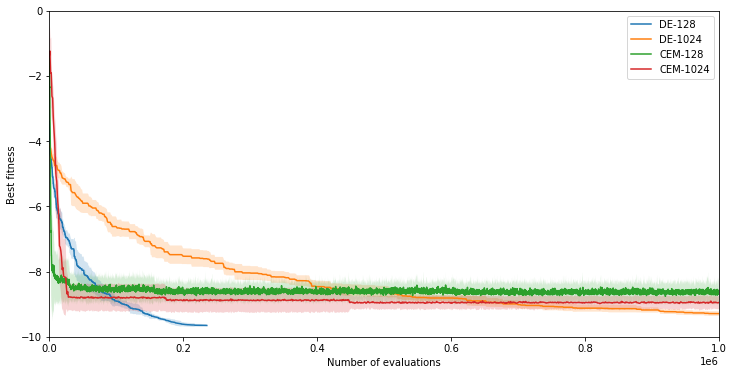

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=1e6)
plt.ylim(-10, 0)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('michalewicz_10.png')
plt.show()

## **Ackley**

### **d=2**

In [ ]:
# DE_128
fobj = ackley
bounds = [(-33,33)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = ackley
bounds = [(-33,33)]
dimensions = 2
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = ackley
bounds = [(-33,33)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = ackley
bounds = [(-33,33)]
dimensions = 2
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e5
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

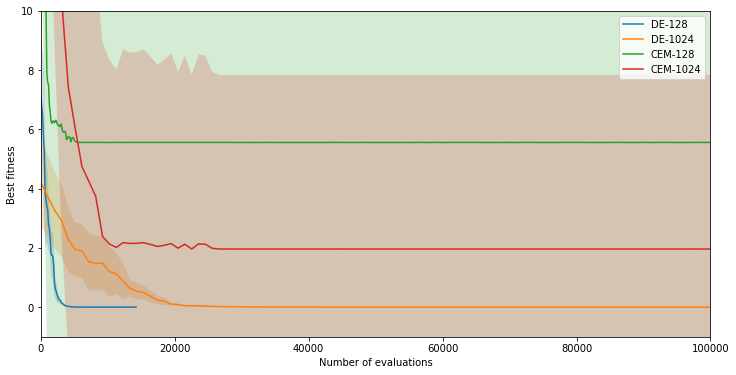

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=1e5)
plt.ylim(-1, 10)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('ackley_2.png')
plt.show()

### **d=10**

In [ ]:
# DE_128
fobj = ackley
bounds = [(-33,33)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_128 = []
std_de_128 = [] 
eval_de_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_128.append(np.mean(f))
    std_de_128.append(np.std(f))
    eval_de_128.append(np.mean(num_evals))

In [ ]:
# DE_1024
fobj = ackley
bounds = [(-33,33)]
dimensions = 10
F_scale = 0.8
cross_prob = 0.7
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results, all_pops = de(fobj, bounds*dimensions, F_scale, cross_prob, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_de_1024 = []
std_de_1024 = [] 
eval_de_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_de_1024.append(np.mean(f))
    std_de_1024.append(np.std(f))
    eval_de_1024.append(np.mean(num_evals))

In [ ]:
# CEM_128
fobj = ackley
bounds = [(-33,33)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 128
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_128 = []
std_cem_128 = [] 
eval_cem_128 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_128.append(np.mean(f))
    std_cem_128.append(np.std(f))
    eval_cem_128.append(np.mean(num_evals))

In [ ]:
# CEM_1024
fobj = ackley
bounds = [(-33,33)]
dimensions = 10
sigma_init = 1
num_elite = 10
extra_variance = 0.01
popsize = 1024
max_evals = 1e6
random_seed = 19521432

all_results = []
for _ in range(10):
    results = cem(fobj, bounds*dimensions, sigma_init, num_elite, extra_variance, popsize, max_evals, random_seed)
    all_results.append(results)
    random_seed += 1

f_cem_1024 = []
std_cem_1024 = [] 
eval_cem_1024 = []

for i in range(np.min([len(all_results[k]) for k in range(10)])):
    f = []
    num_evals = []
    for j in range(10):
        f.append(all_results[j][i][1])
        num_evals.append(all_results[j][i][2])
    f_cem_1024.append(np.mean(f))
    std_cem_1024.append(np.std(f))
    eval_cem_1024.append(np.mean(num_evals))

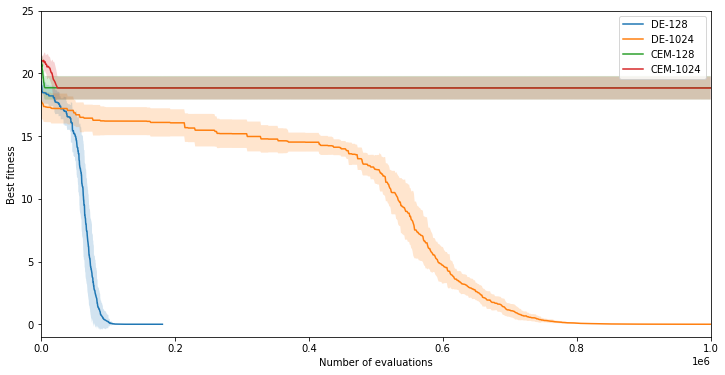

In [ ]:
error_pos_de_128, error_neg_de_128 = [], []
for i in range(len(f_de_128)):
    error_pos_de_128.append(f_de_128[i] + std_de_128[i])
    error_neg_de_128.append(f_de_128[i] - std_de_128[i])

error_pos_de_1024, error_neg_de_1024 = [], []
for i in range(len(f_de_1024)):
    error_pos_de_1024.append(f_de_1024[i] + std_de_1024[i])
    error_neg_de_1024.append(f_de_1024[i] - std_de_1024[i])

error_pos_cem_128, error_neg_cem_128 = [], []
for i in range(len(f_cem_128)):
    error_pos_cem_128.append(f_cem_128[i] + std_cem_128[i])
    error_neg_cem_128.append(f_cem_128[i] - std_cem_128[i])

error_pos_cem_1024, error_neg_cem_1024 = [], []
for i in range(len(f_cem_1024)):
    error_pos_cem_1024.append(f_cem_1024[i] + std_cem_1024[i])
    error_neg_cem_1024.append(f_cem_1024[i] - std_cem_1024[i])

plt.figure(figsize=(12, 6))
plt.xlim(left=0, right=1e6)
plt.ylim(-1, 25)

# DE_128
plt.plot(eval_de_128, f_de_128, label="DE-128")
plt.fill_between(eval_de_128, error_pos_de_128, error_neg_de_128, alpha = 0.2)

# DE_1024
plt.plot(eval_de_1024, f_de_1024, label="DE-1024")
plt.fill_between(eval_de_1024, error_pos_de_1024, error_neg_de_1024, alpha = 0.2)

# CEM_128
plt.plot(eval_cem_128, f_cem_128, label="CEM-128")
plt.fill_between(eval_cem_128, error_pos_cem_128, error_neg_cem_128, alpha = 0.2)

# CEM_1024
plt.plot(eval_cem_1024, f_cem_1024, label="CEM-1024")
plt.fill_between(eval_cem_1024, error_pos_cem_1024, error_neg_cem_1024, alpha = 0.2)

plt.xlabel('Number of evaluations')
plt.ylabel('Best fitness')
plt.legend()
plt.savefig('ackley_10.png')
plt.show()